In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [6]:
dataset=pd.read_csv("/content/AirPassengers.csv")
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)

In [8]:
indexedDataset=dataset.set_index(['Month'])

In [9]:
from datetime import datetime
indexedDataset.head(5)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


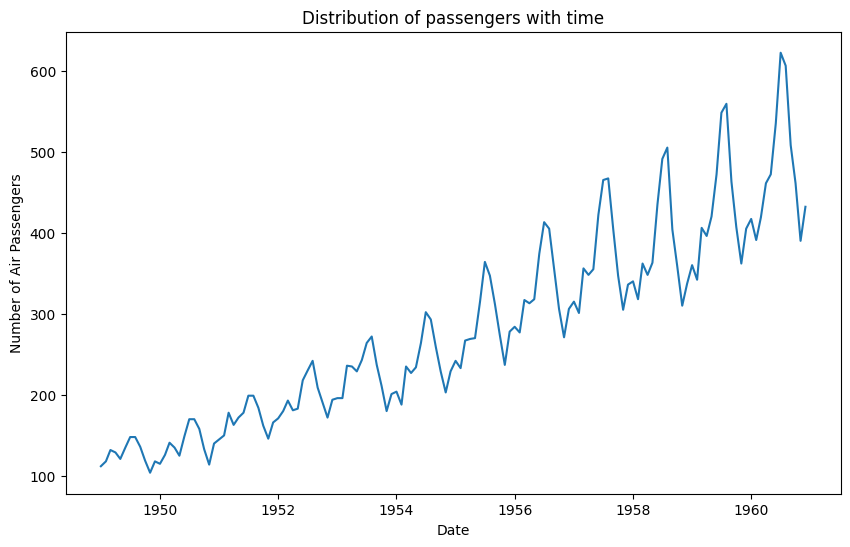

In [10]:
#Plot graph
plt.title('Distribution of passengers with time')
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.plot(indexedDataset)

In [11]:
#Determining Rolling Statistics
rolmean=indexedDataset.rolling(window=12).mean()  #Window=12(monthly),365(daily),2(Half yearly)
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


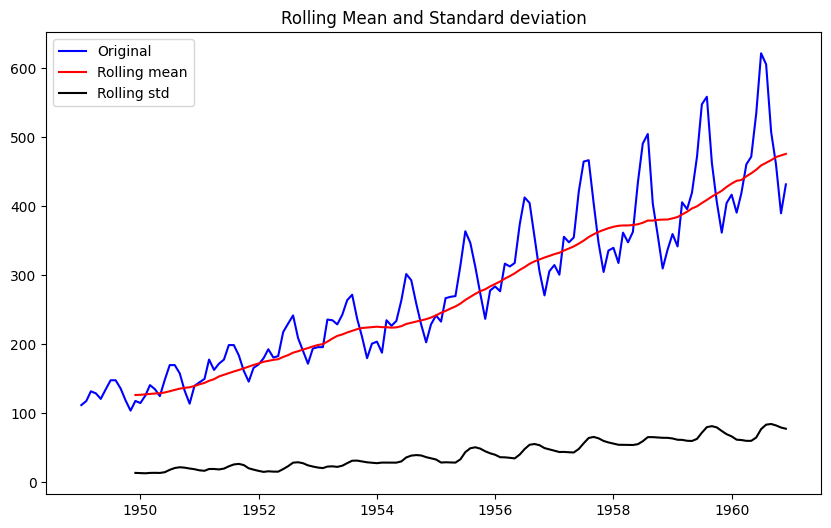

In [12]:
#Plot Rolling Statistics
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard deviation")
plt.show(block=False)

In [13]:
#Perform ADCF test
from statsmodels.tsa.stattools import adfuller
print("Results of ADCF Test")
dftest=adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results of ADCF Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


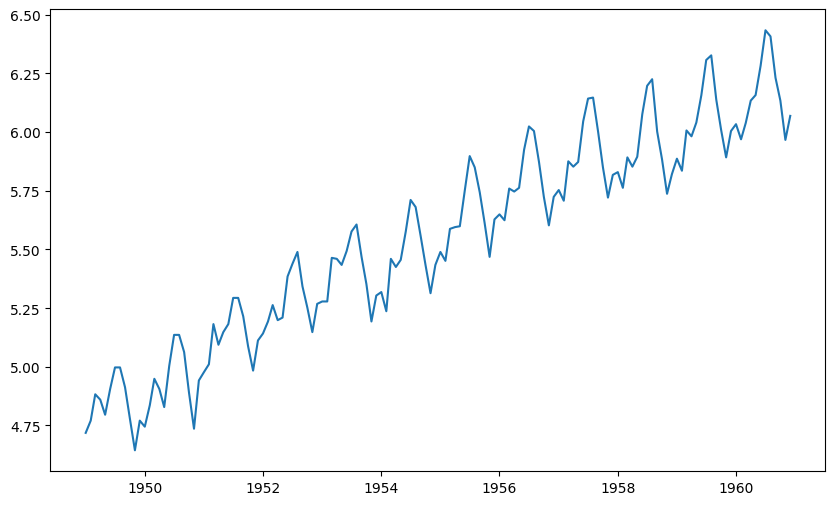

In [14]:
#Estimating Trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

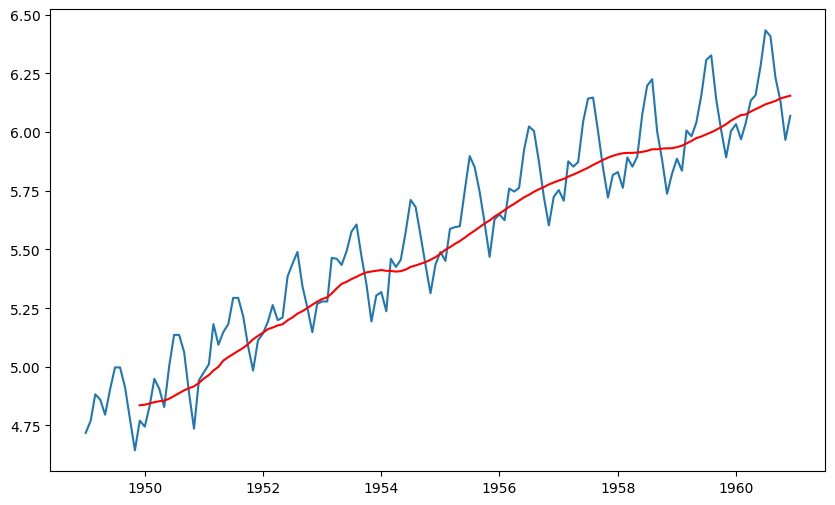

In [15]:
moving_average=indexedDataset_logScale.rolling(window=12).mean()
moving_STD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(moving_average,color='red')

In [16]:
datasetLogScaleMinusMovingAverage=(indexedDataset_logScale-moving_average)
datasetLogScaleMinusMovingAverage.head(12)


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [17]:
##Removing NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
   movingAverage= timeseries.rolling(window=12).mean()
   movingSTD=timeseries.rolling(window=12).std()

   #Plot Rolling Statistics
   orig=plt.plot(timeseries,color='blue',label='Original')
   mean=plt.plot(movingAverage,color='red',label='Rolling mean')
   std=plt.plot(movingSTD,color='black',label='Rolling std')
   plt.legend(loc='best')
   plt.title("Rolling Mean and Standard deviation")
   plt.show(block=False)

  #ADCF test
   print("Results of ADCF Test")
   dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
   dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
   for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
   print(dfoutput)



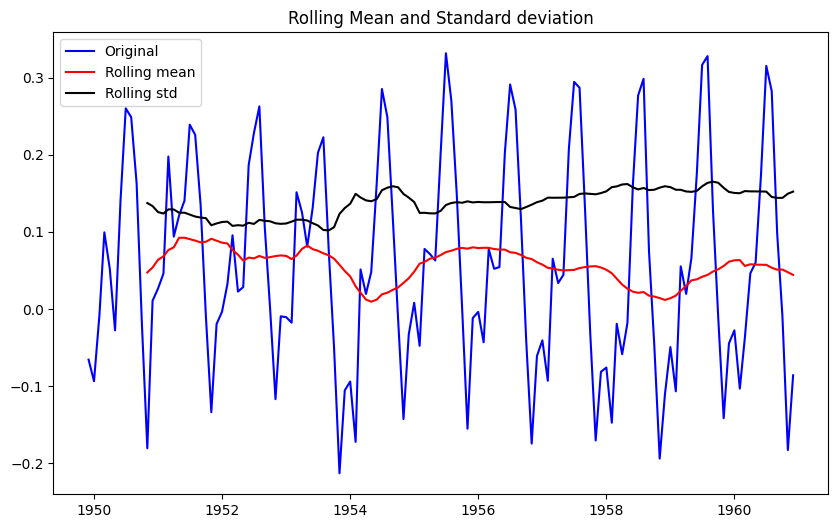

Results of ADCF Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [19]:
test_stationarity(datasetLogScaleMinusMovingAverage)

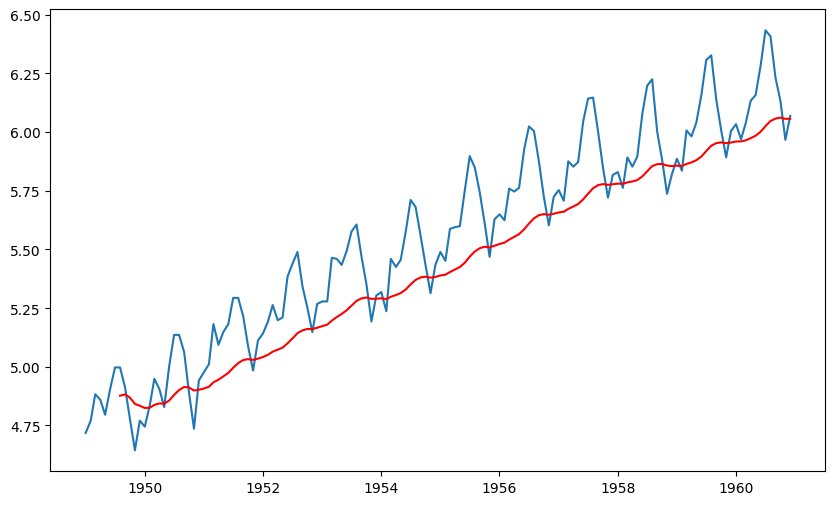

In [20]:

MovingExponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12,min_periods=8,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(MovingExponentialDecayWeightedAverage,color='red')

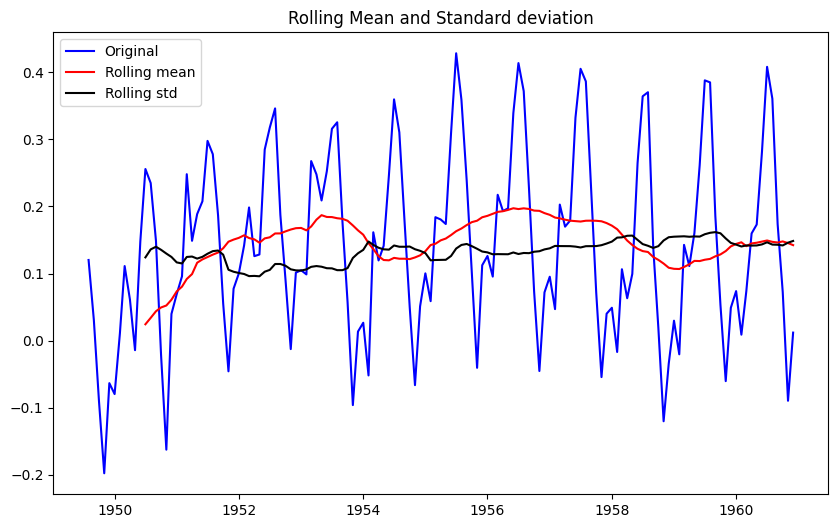

Results of ADCF Test


MissingDataError: ignored

In [22]:
datasetLogScaleMinusMovingExponentialDecayWeightedAverage=(indexedDataset_logScale-MovingExponentialDecayWeightedAverage)
test_stationarity(datasetLogScaleMinusMovingExponentialDecayWeightedAverage)

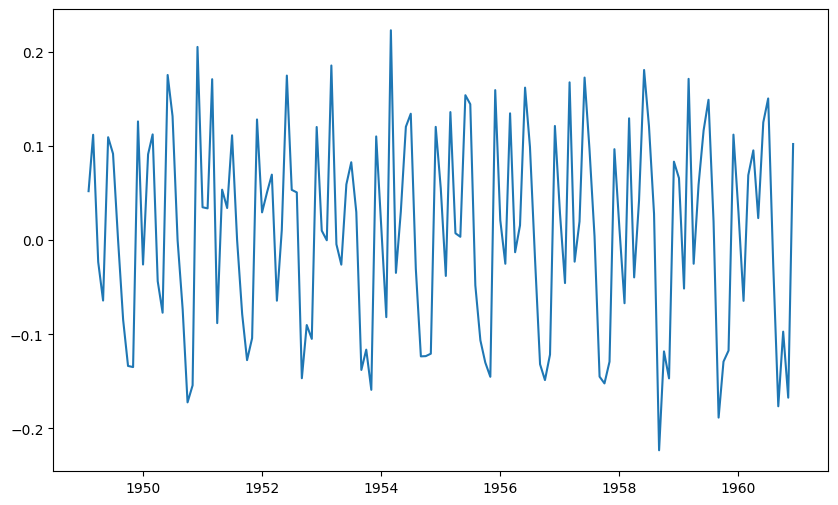

In [23]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

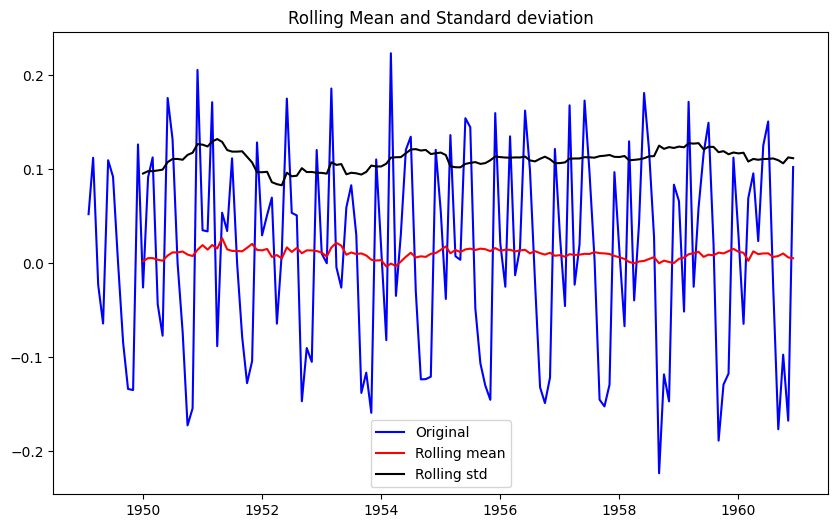

Results of ADCF Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


In [24]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

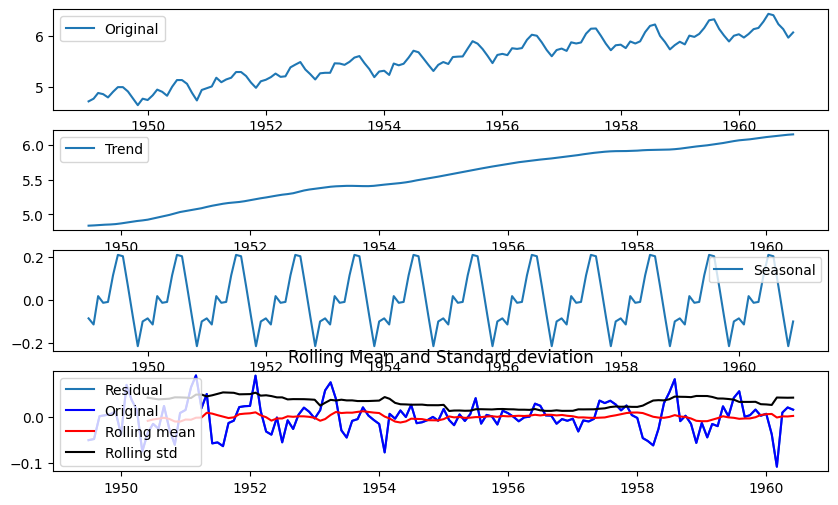

Results of ADCF Test


KeyError: ignored

In [25]:
#Components of Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)





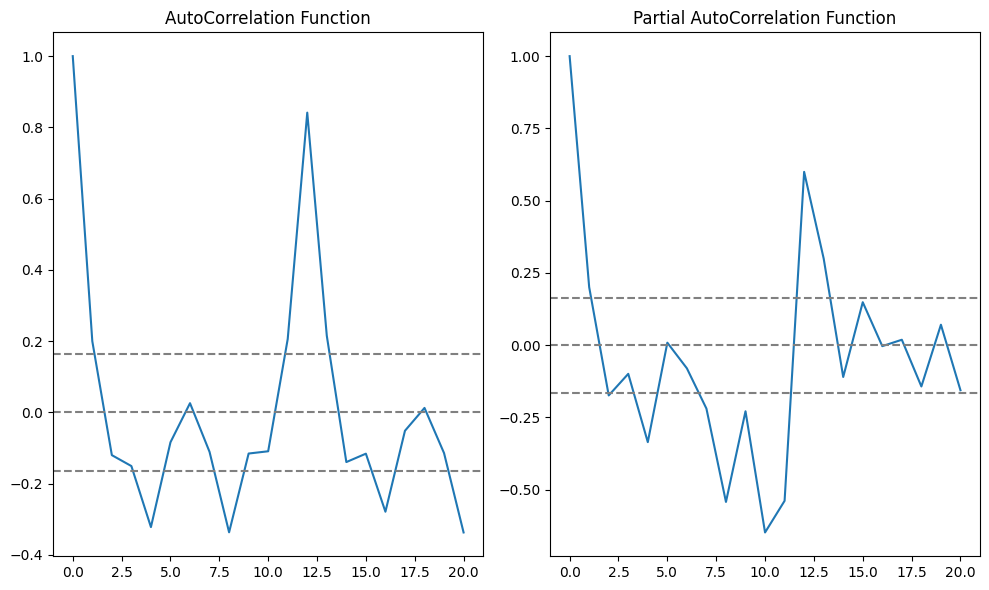

In [26]:
#ACF(Auto Correlation Test) and PACF(Partial Auto Correlation) test
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')  #OLS-Ordinary Least Squares

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

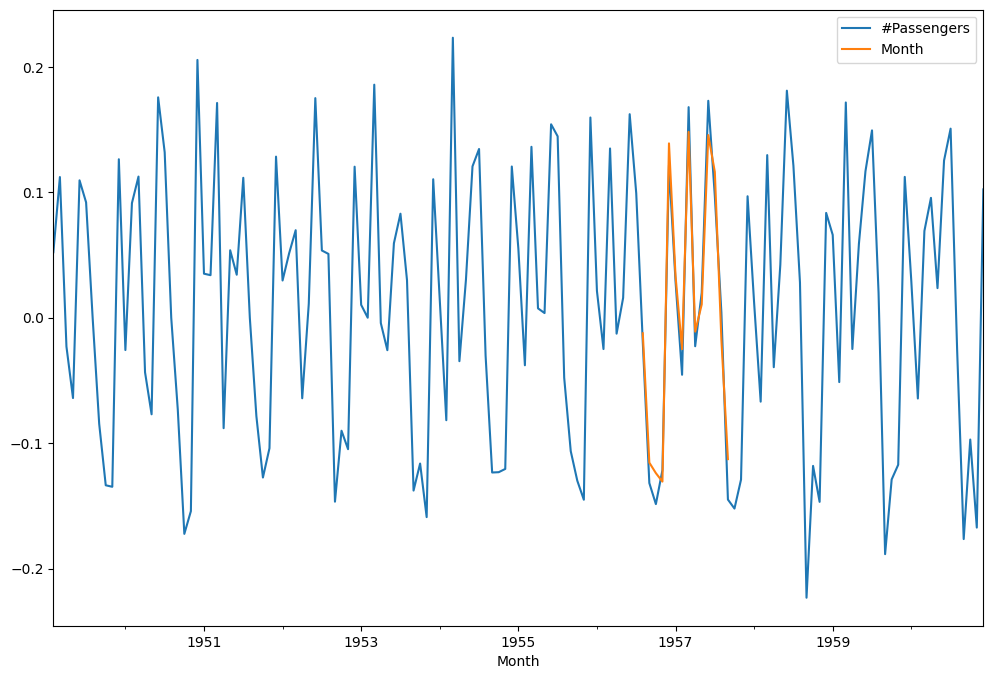

In [34]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(datasetLogDiffShifting['#Passengers'],order=(2,1,2),seasonal_order=(2,1,2,12))
#ARIMA Model
results=model.fit()
datasetLogDiffShifting['Month']=results.predict(start=90,end=103,dynamic=True)
datasetLogDiffShifting[['#Passengers','Month']].plot(figsize=(12,8))

